# PyTorch based ANN to classify mnist handwritten digits


# Import libraries

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as  optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torchsummary import summary

In [3]:

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17527399.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 489662.69it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4357625.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2759346.58it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
mnist_trainset.data.shape,mnist_testset.data.shape,mnist_trainset.targets.shape,mnist_testset.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

# Import Dataset

In [5]:
mnist_trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
len(mnist_trainset),len(mnist_testset)

(60000, 10000)

In [7]:

batch_size=256
train_loader=DataLoader(mnist_trainset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(mnist_testset,batch_size=batch_size,shuffle=False)

In [8]:
len(train_loader),len(test_loader)


(235, 40)

In [9]:
data_iter=iter(train_loader)

images,labels=next(data_iter)
print(images.shape,labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


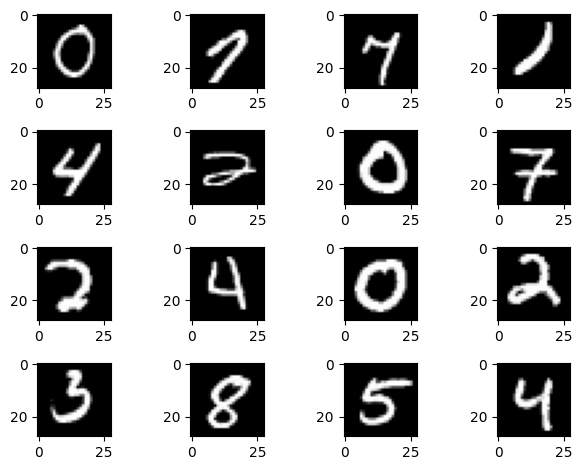

In [10]:

n=16

# plt.figure(figsize=(20,20))

for i in range(1,n+1):
  plt.subplot(4,4,i)
  plt.imshow(images[i-1].reshape(28,28),cmap='gray')

plt.tight_layout()

# Model

In [33]:

# class ANN( nn.Module):

#     def __init__(self):
#         super(ANN,self).__init__()
#         self.fc1= nn.Linear(28*28,256)
#         self.fc2= nn.Linear(256,128)
#         self.fc3= nn.Linear(128,64)
#         self.fc4= nn.Linear(64,10)

#     def forward(self,x):
#         out = x.view(-1,28*28)
#         out=self.fc1(out)
#         out=F.relu(out)
#         out=self.fc2(out)
#         out=F.relu(out)
#         out=self.fc3(out)
#         out=F.relu(out)
#         out=self.fc4(out)
#         return out



class CNN(nn.Module):

    def __init__(self):
        super(CNN,self).__init__()

        self.conv1= nn.Conv2d(1,10,kernel_size=5,stride=1,padding=1)

        self.conv2= nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)

        # units in FC layer
        expectSize= np.floor((5+2*0-1)/1) +1
        expectSize=20*int(expectSize**2)

        self.fc1= nn.Linear(expectSize,50)

        self.out=nn.Linear(50,10)



    def forward(self,x):


        # print(f'input : {x.shape}')

        x=F.relu(F.max_pool2d(self.conv1(x),2))
        # print(f'cov1/pool1 : {x.shape}')

        x=F.relu(F.max_pool2d(self.conv2(x),2))
        # print(f'conv2/pool2 : {x.shape}')

        nUnits= x.shape.numel()/x.shape[0]
        x=x.view(-1,int(nUnits))
        # print(f'input to dense: {x.shape}')

        x=F.relu(self.fc1(x))

        # print(f'fc1 layer : {x.shape}')

        x=self.out(x)

        # print(f'output layer : {x.shape}')



        return x




In [34]:
model=CNN()

print(model.parameters)

<bound method Module.parameters of CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=10, bias=True)
)>


In [35]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# Training and Evaluation

In [36]:
epochs=10

In [32]:
data_iter=iter(train_loader)

images,labels=next(data_iter)
print(images.shape,labels.shape)
output =model(images)


torch.Size([256, 1, 28, 28]) torch.Size([256])
input : torch.Size([256, 1, 28, 28])
cov1/pool1 : torch.Size([256, 10, 13, 13])
conv2/pool2 : torch.Size([256, 20, 5, 5])
input to dense: torch.Size([256, 500])
fc1 layer : torch.Size([256, 50])
output layer : torch.Size([256, 10])


In [37]:
from tqdm import tqdm
training_loss=[]
testing_loss=[]

training_accuracy=[]
testing_accuracy=[]

for epoch in range(epochs):

    train_acc=0
    train_loss=0


    model.train()



    for images,labels in tqdm(train_loader ,desc='training in batches'):

        output =model(images)

        optimizer.zero_grad()
        loss= loss_fn(output,labels)
        loss.backward()
        optimizer.step()

        preds=torch.argmax(output,axis=1)

        train_acc += (preds==labels).sum().item()
        train_loss+=loss.item()

    training_accuracy.append(round( train_acc /len(mnist_trainset),2))
    training_loss.append( round(train_loss/len(train_loader),2))


    model.eval()

    test_loss=0
    test_acc=0

    with torch.no_grad():
        for images,labels in test_loader:

            output =model(images)
            loss= loss_fn(output,labels)
            preds=torch.argmax(output,axis=1)

            test_acc += (preds==labels).sum().item()
            test_loss+=loss.item()

    testing_accuracy.append(  round( test_acc /len(mnist_testset) ,2 ))
    testing_loss.append( round(test_loss/len(test_loader),2))


    print ( f"Epoch {epoch+1} , Training Acc: {training_accuracy[epoch]},Training Loss :{training_loss[epoch]}, Testing Acc: {testing_accuracy[epoch]},Testing Loss :{testing_loss[epoch]} ")




training in batches: 100%|██████████| 235/235 [00:35<00:00,  6.55it/s]


Epoch 1 , Training Acc: 0.85,Training Loss :0.53, Testing Acc: 0.95,Testing Loss :0.15 


training in batches: 100%|██████████| 235/235 [00:36<00:00,  6.51it/s]


Epoch 2 , Training Acc: 0.96,Training Loss :0.12, Testing Acc: 0.98,Testing Loss :0.08 


training in batches: 100%|██████████| 235/235 [00:35<00:00,  6.57it/s]


Epoch 3 , Training Acc: 0.97,Training Loss :0.08, Testing Acc: 0.98,Testing Loss :0.06 


training in batches: 100%|██████████| 235/235 [00:35<00:00,  6.58it/s]


Epoch 4 , Training Acc: 0.98,Training Loss :0.07, Testing Acc: 0.98,Testing Loss :0.05 


training in batches: 100%|██████████| 235/235 [00:34<00:00,  6.86it/s]


Epoch 5 , Training Acc: 0.98,Training Loss :0.06, Testing Acc: 0.99,Testing Loss :0.04 


training in batches: 100%|██████████| 235/235 [00:34<00:00,  6.76it/s]


Epoch 6 , Training Acc: 0.98,Training Loss :0.05, Testing Acc: 0.99,Testing Loss :0.04 


training in batches: 100%|██████████| 235/235 [00:34<00:00,  6.71it/s]


Epoch 7 , Training Acc: 0.99,Training Loss :0.04, Testing Acc: 0.99,Testing Loss :0.04 


training in batches: 100%|██████████| 235/235 [00:35<00:00,  6.57it/s]


Epoch 8 , Training Acc: 0.99,Training Loss :0.04, Testing Acc: 0.99,Testing Loss :0.04 


training in batches: 100%|██████████| 235/235 [00:34<00:00,  6.71it/s]


Epoch 9 , Training Acc: 0.99,Training Loss :0.04, Testing Acc: 0.99,Testing Loss :0.04 


training in batches: 100%|██████████| 235/235 [00:35<00:00,  6.70it/s]


Epoch 10 , Training Acc: 0.99,Training Loss :0.03, Testing Acc: 0.99,Testing Loss :0.03 


In [43]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             260
            Conv2d-2           [-1, 20, 11, 11]           5,020
            Linear-3                   [-1, 50]          25,050
            Linear-4                   [-1, 10]             510
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.12
Estimated Total Size (MB): 0.19
----------------------------------------------------------------


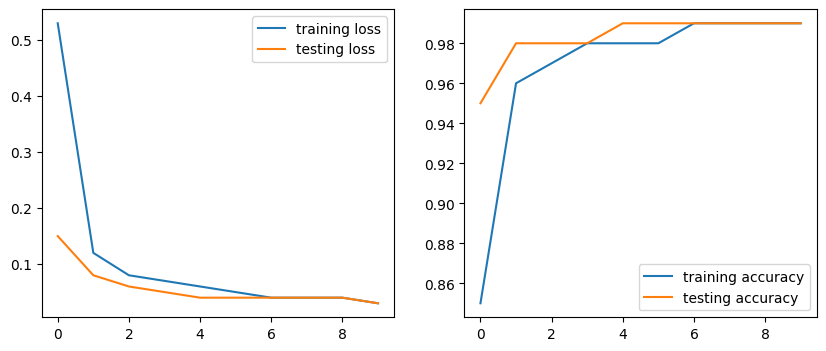

In [44]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(epochs),training_loss,label='training loss' )
plt.plot(range(epochs),testing_loss,label='testing loss' )
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs),training_accuracy,label='training accuracy' )
plt.plot(range(epochs),testing_accuracy  ,label='testing accuracy' )
plt.legend()

plt.show()

# TEST

In [49]:
data_iter=iter(test_loader)

images,labels=next(data_iter)
print(images[0].shape,labels.shape)

torch.Size([1, 28, 28]) torch.Size([256])
